# Olympic Games dataset analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data
data = pd.read_csv(".\Olympic_games_dataset.csv")
#data.head(20)

In [73]:
print(min(data["Year"]),
      max(data["Year"])
)

1896 2016


# Prepare data

Note about Region: many Asian countries share continents with Europe and Africa (Russia, Egypt, Turkey, etc.). These have been added to Europe and Africa respectively. This choice is arbitrary and relies solely on the fact I prepared the Europe and Africa filters before Asia. This means certain stats may favor Europe/Africa instead of Asia (and vice-versa)

In [4]:
# Get data for EU region through an "EU" filter
# EU filter
eu = [
    "GER", "BEL", "AUT", "BUL", "CYP", "CRO", "DEN", "ESP", "EST",
    "FIN", "FRA", "GRE", "HUN", "IRL", "ITA", "LAT", "LTU", "LUX",
    "MLT", "NED", "POL", "POR", "CZE", "ROU", "SVK", "SLO", "SWE",
]

# Africa
af = [
    "ALG", "ANG","BEN", "BOT", "BUR", "BDI", "CMR","CPV","CAF","CHA",
    "COM","COD","CGO","CIV","DJI","EGY","GEQ","ERI","GAB","GAM",
    "GHA","GUI","KEN", "LES", "LBR","LBA","MAD","MAW","MLI","MTN",
    "MRI","MAR","MOZ","NAM","NIG","NGR","RWA","STP","SEN","SEY",
    "SLE","SOM","RSA","SSD", "SUD", "SWZ", "TAN", "TOG", "TUN", "UGA",
    "ZAM","ZIM","ETH", "GBS", "RHO", "UAR"
]

# Europe (non-EU)
europe = [
    "ALB","AND","ARM","AZE","BLR","BIH","GEO","KAZ","LIE","MKD",
    "MDA","MON","MNE","RUS","SMR","SRB","SUI","TUR","UKR","GBR",
    "KOS", "EUN", "ISL", "NOR", "SCG", "URS","BOH", "CRT", "FRG", 
    "GDR", "SAA", "TCH", "YUG"
]

# South America
sam = [
    "ARG","BOL","BRA","CHI","COL","ECU","GUY","PAR","PER","SUR",
    "URU","VEN"
]

# North America
nam = [
    "ANT","BAH","BAR","BIZ","CAN","CRC","CUB","DMA","DOM","ESA",
    "GRN","GUA","HAI","HON","JAM","MEX","NCA","PAN","SKN","LCA",
    "VIN","TTO","USA","AHO", "ARU", "BER", "CAY", "ISV", "IVB", 
    "NFL", "PUR", "WIF"

]

# Oceania
oce = [
    "AUS","FIJ","COK","INA","KIR","MHL","NRU","NZL","PLW","PNG",
    "SAM","SOL","TGA","TUV","VAN","ANZ", "ASA", "FSM", "GUM"
]

# Asia
asia = [
    "AFG","BRN","BAN","BHU","BRU","MYA","CAM","CHN","KOR","PRK",
    "TLS","IND","IRI","IRQ","ISR","JPN","JOR","KUW","KGZ","LAO",
    "LIB","MAS","MDV","MGL","NEP","OMA","PAK","PLE","PHI","QAT",
    "KSA","SGP","SRI","SYR","TJK","THA","TKM","UAE","UZB","VIE",
    "YEM", "HKG","MAL", "NBO", "TPE", "VNM", "YAR", "YMD"
]

# Other: no specific country affiliation
other = ["IOA", "ROT", "UNK"]

In [282]:
# Filters to check NOC codes of countries (exact match)
data[data["Team"]=="Macau"]["NOC"].unique()

# More powerful filter (fuzzy match)
#data[data["Team"].str.contains("Timor")]["NOC"].unique() 

array([], dtype=object)

In [46]:
# Check if we captures all NOC codes in a continent
print(len(data["NOC"].unique()),
      len(eu)+len(af)+len(europe)+len(sam)+len(nam)+len(oce)+len(asia)
      )

230 227


In [47]:
# Some NOC have not been assigned - get the list of NOC not part of any continent
# 1. Create a list with all uniques already assigned.
in_region = list()
continents = [eu,af,europe,sam,nam,oce,asia]

for e in continents:
    for c in e:
        in_region.extend(e)

# 2. Create a list with ALL uniques
unique = list(data["NOC"].unique())
# 3. Get a list of differences
not_inregion = np.setdiff1d(unique,in_region)

In [48]:
# TO BE CHECKED
not_inregion

array(['IOA', 'ROT', 'UNK'], dtype='<U3')

In [38]:
# Add these to respective variables
north_am = ["AHO", "ARU", "BER", "CAY", "ISV", "IVB", "NFL", "PUR", "WIF"]
oceania = ["ANZ", "ASA", "FSM", "GUM"]
eur = ["EUN", "ISL", "NOR", "SCG", "URS","BOH", "CRT", "FRG", "GDR", "SAA", "TCH", "YUG"]
afrique = ["ETH", "GBS", "RHO", "UAR"]
asie = ["MAL", "NBO", "TPE", "VNM", "YAR", "YMD"]
other = ["IOA", "ROT", "UNK"]

In [14]:
# Add column with regions to the data frame
regions = list()
all_teams = list(data["NOC"])
continents = [eu,af,europe,sam,nam,oce,asia]

In [15]:
# Fill in regions list
for e in all_teams:
    if eu.__contains__(e):
        regions.append("European Union")
    elif af.__contains__(e):
        regions.append("Africa")
    elif europe.__contains__(e):
        regions.append("Europe")
    elif sam.__contains__(e):
        regions.append("South America")
    elif nam.__contains__(e):
        regions.append("North America")
    elif oce.__contains__(e):
        regions.append("Oceania")
    elif asia.__contains__(e):
        regions.append("Asia")
    else:
        regions.append("Other")

In [17]:
# Add regions list as a new column to data frame
data["Region"] = regions

In [59]:
data["Region"].value_counts()

Region
European Union    106342
Europe             59063
North America      39605
Asia               30702
Africa             12115
South America      11907
Oceania            11274
Other                108
Name: count, dtype: int64

In [63]:
# Drop region "Other" -> not big, will not have much impact on the data set 
data = data.drop(data[data["Region"]=="Other"].index)

In [64]:
data["Region"].value_counts()

Region
European Union    106342
Europe             59063
North America      39605
Asia               30702
Africa             12115
South America      11907
Oceania            11274
Name: count, dtype: int64

In [65]:
# Create DF's for each region for further use
eu_data = data[data["Region"]=="European Union"]
ec_data = data[data["Region"].isin(["Europe","European Union"])]
na_data = data[data["Region"]=="North America"]
sa_data = data[data["Region"]=="South America"]
af_data = data[data["Region"]=="Africa"]
as_data = data[data["Region"]=="Asia"]
oc_data = data[data["Region"]=="Oceania"]

# World stats

In [66]:
# Medals won by EU vs World
medals_region = data[["Region","Medal", "ID"]].groupby(by=["Region", "Medal"], as_index=False).count()


# Total count of athletes: EU vs World
athletes = data[["Region", "ID"]].groupby(by="Region", as_index=False).count()

In [81]:
medals_region

,Region,Medal,ID
0,Africa,Bronze,225
1,Africa,Gold,174
2,Africa,Silver,171
3,Asia,Bronze,1081
4,Asia,Gold,1066
5,Asia,Silver,1076
6,Europe,Bronze,3555
7,Europe,Gold,3775
8,Europe,Silver,3692
9,European Union,Bronze,5377


Text(0.5, 1.0, "Proportion d'athlètes aux J.O. par continent (1896-2016)")

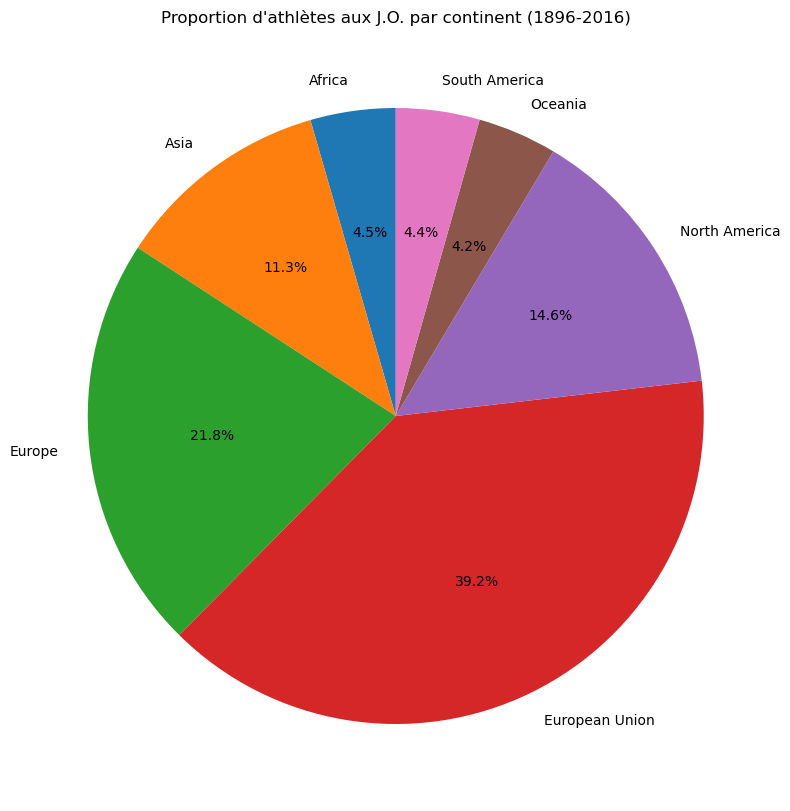

In [80]:
# 1D arrays of labels and values
a_labels = list(athletes["Region"])
a_values = list(athletes["ID"]) 

# Plot 1: EU vs World
plt.figure(figsize=(10,10))
plt.pie(a_values, labels=a_labels, startangle=90, autopct="%1.1f%%")
plt.title("Proportion d'athlètes aux J.O. par continent (1896-2016)")

([<matplotlib.patches.Wedge at 0x1ca4e70f190>,
 [Text(0.4445165266916953, 1.0061834114603319, ''),
  Text(-1.0960642716894022, -0.09296834044974996, ''),
  Text(0.5279653500307007, -0.9650142947992844, '')])

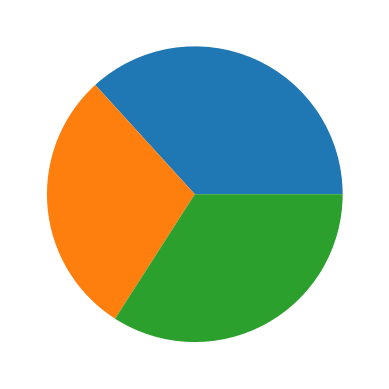

In [49]:
plt.pie(medals_eu["ID"])

# European Union

In [8]:
# EU medals, height, and weight
eu_medals = eu_data.groupby(by="NOC", as_index=False).agg({"Height":"median", "Weight":"median", "Medal":"count"})
#eu_medals

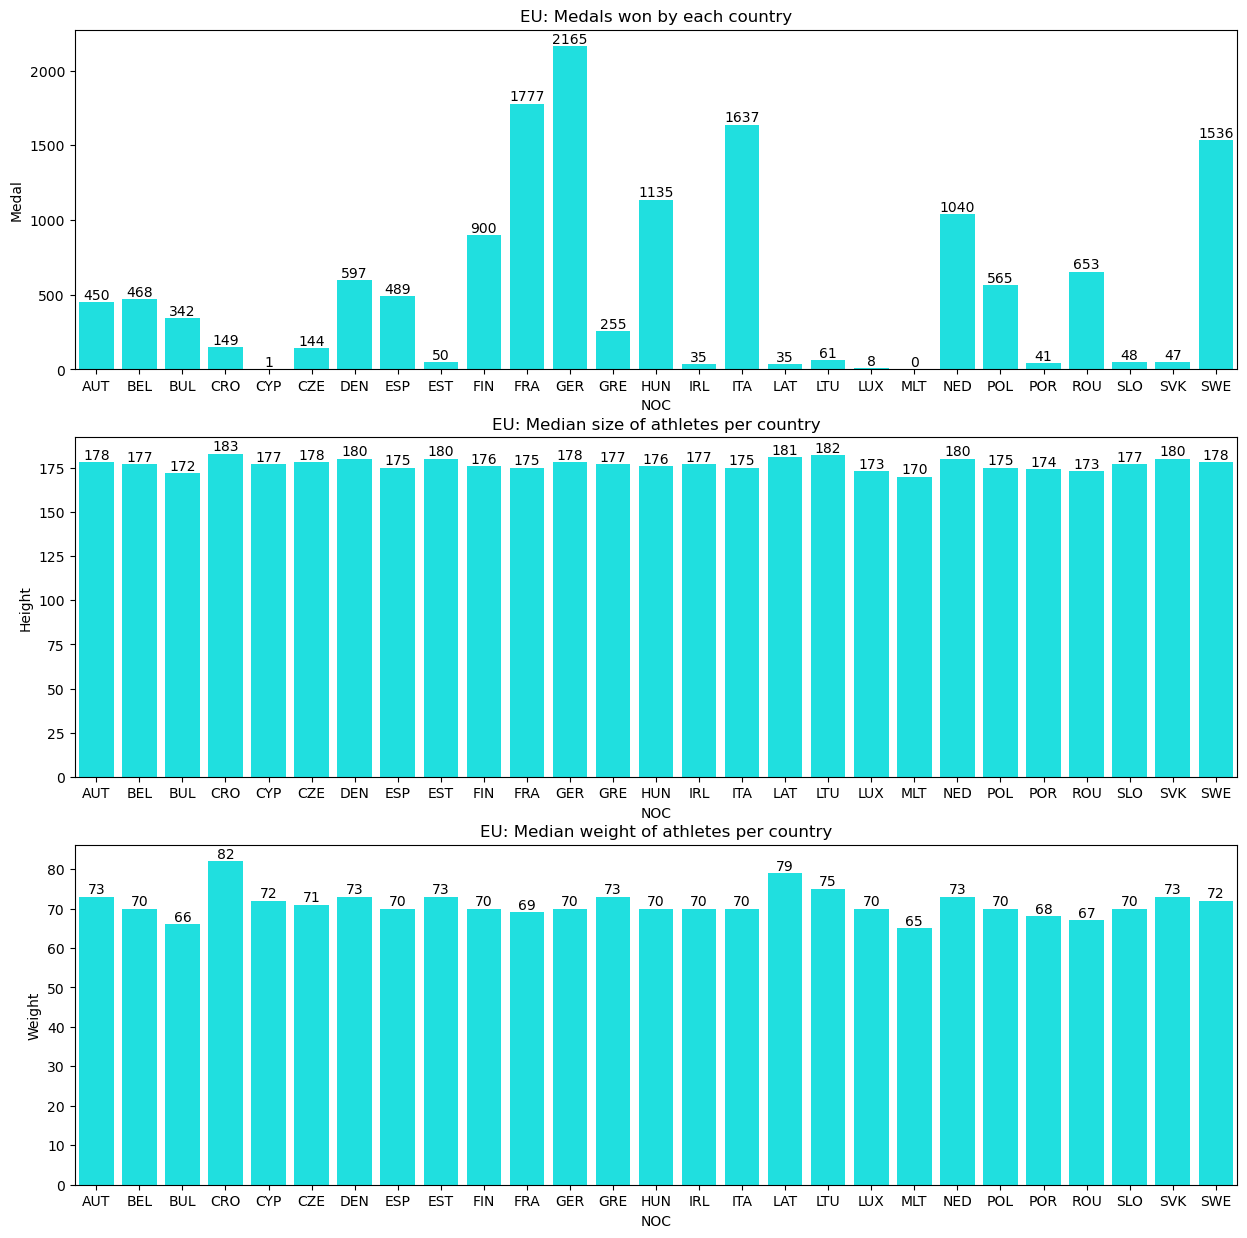

In [18]:
plt.figure(figsize=(15,15))

# 1. Medal count
plt.subplot(3,1,1)
plt.title("EU: Medals won by each country")
mds = sns.barplot(eu_medals, x="NOC", y="Medal", color="cyan")
# get values to appear
for i in mds.containers:
    mds.bar_label(i,)

# 2. Median heights
plt.subplot(3,1,2)
plt.title("EU: Median size of athletes per country")
hgt = sns.barplot(eu_medals, x="NOC", y="Height", color="cyan")

for i in hgt.containers:
    hgt.bar_label(i,)


# 3. Median weights
plt.subplot(3,1,3)
plt.title("EU: Median weight of athletes per country")
wgt = sns.barplot(eu_medals, x="NOC", y="Weight", color="cyan")

for i in wgt.containers:
    wgt.bar_label(i,)
